In [2]:
using Pkg
Pkg.add("Latexify");
Pkg.add("LaTeXStrings");
Pkg.add("LinearAlgebra");
Pkg.add("JuMP");
Pkg.add("Clp");
Pkg.add("PyPlot");
Pkg.add("NamedArrays")
Pkg.add("CSV");
Pkg.add("DataFrames");

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.t

In [2]:
println("Homework 2 - Jacob Lorenz")

Homework 2 - Jacob Lorenz


## Problem 1 - Construction with Constraints

**During the next 4 months, a construction firm must complete three projects. Each project has a deadline as well as labor requirements.**

**- Project 1 must be completed no later than 3 months from now and requires 8 worker-months of labor**

**- Project 2 must be completed no later than 4 months from now and requires 10 worker-months of labor**

**- Project 3 must be completed no later than 2 months from now and requires 12 worker-months of labor**

**Each month, 8 workers are available. During a given month, no more than 6 workers can work on a single job. Determine whether all 3 projects can be completed on time.**

When we take some time to think through this problem and process the important information and objectives, we can see this problem effectively becomes a transportation problenm. In this case, we do not need to consider the individual workers as a part of our network, thus reducing the complexity by a layer, or 50%. Instead, we can think of this problem as having 4 source nodes, 1 for each month, where each month has a maximum supply of 8. Furthermore we can set capacity / timing restrictions by limiting the flow of worker-months for certain edges, and demand constraints with sums of relevant variables. Finally, since we do not necessarily have an explicit cost here, we will just say each worker-month costs 1, and we want to minimize the overall cost since any practical business would prefer to not waste resources if they can afford to spare some. With that being said, we have the following model:

Let $x_{ij}$ represent the flow of worker-months going from month i to project j where $i \in \{1,2,3,4\}$ and $j \in \{5,6,7\}$. We can apply constraints to these flow variables to model the particularities of our system. We will cover these constraints in 3 parts, supply, capacity, and demand.

$\textbf{Supply:}$

Supply is an easy one, we know that each of the supply nodes represent months, and each of the months have at most 8 worker-months worth of flow to supply. So, we can model that as follows, remembering our convention for the flow variable denotations:

$$
    x_{15} + x_{16} + x_{17} \leq 8 \\
    x_{25} + x_{26} + x_{27} \leq 8 \\
    x_{35} + x_{36} + x_{37} \leq 8 \\
    x_{45} + x_{46} + x_{47} \leq 8 \\
$$

$\textbf{Demand:}$

Demand is an easy one, we know the number of total worker-months worth of flow each of the project nodes requires, so we can model them rather simply. One thing to note; however, is we use $\geq$ here because strictly speaking, there is no requirement that specifies a strict equality, and we recognize that the solver will set these to equality as a part of minimizing overall cost. Doing this saves us a few equations worth of data to process versus using equality.

$$
    x_{15} + x_{25} + x_{35} + x_{45} \geq 8 \\
    x_{16} + x_{26} + x_{36} + x_{46} \geq 10 \\
    x_{17} + x_{27} + x_{37} + x_{47} \geq 12
$$

$\textbf{Capacity:}$

The capacity constraints we put on our system are what give rise to the system's characteristics. This is where we can place limits such as the maximum number of worker-months per month on any given project = 6, or the restrictions that certain projects need to be finished within a particular timeframe (we can set the flow restriction on variables such as $x_{45}$ to 0 to simulate not allowing any work to be done on project 1 in month 4, for example.

$$
    0 \leq x_{15} \leq 6 \\
    0 \leq x_{16} \leq 6 \\
    0 \leq x_{17} \leq 6 \\
    0 \leq x_{25} \leq 6 \\
    0 \leq x_{26} \leq 6 \\
    0 \leq x_{27} \leq 6 \\
    0 \leq x_{35} \leq 6 \\
    0 \leq x_{36} \leq 6 \\
    0 \leq x_{37} \leq 0 \\
    0 \leq x_{45} \leq 0 \\
    0 \leq x_{46} \leq 6 \\
    0 \leq x_{47} \leq 0 \\
$$



$$
    \text{A} = 
    \left[ \begin{array}{rl}
                1 \\
                0 \\
                0 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
            \end{array} \right.
            \left. \begin{array}{rl}
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
            \end{array} \right. 
            \left. \begin{array}{rl}
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
            \end{array} \right.
            \left. \begin{array}{rl}
                0 \\
                1 \\
                0 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
            \end{array} \right.
            \left. \begin{array}{rl}
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
            \end{array} \right.
            \left. \begin{array}{rl}
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
            \end{array} \right.
            \left. \begin{array}{rl}
                0 \\
                0 \\
                1 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
            \end{array} \right.
            \left. \begin{array}{rl}
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                0 \\
            \end{array} \right.
            \left. \begin{array}{rl}
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                0 \\
            \end{array} \right.
            \left. \begin{array}{rl}
                0 \\
                0 \\
                0 \\
                1 \\
                -1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
            \end{array} \right.
            \left. \begin{array}{rl}
                0 \\
                0 \\
                0 \\
                1 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                1 \\
                0 \\
            \end{array} \right.
            \left. \begin{array}{rl}
                0 \\
                0 \\
                0 \\
                1 \\
                0 \\
                0 \\
                -1 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                0 \\
                1 \\
            \end{array}\right], \;\;\;
    \text{b} = 
    \left[ \begin{array}{rl}
                8 \\
                8 \\
                8 \\
                8 \\
                -8 \\
                -10 \\
                -12 \\
                6 \\
                6 \\
                6 \\
                6 \\
                6 \\
                6 \\
                6 \\
                6 \\
                0 \\
                0 \\
                6 \\
                0 \\
            \end{array}\right], \;\;\;
    \text{c} = 
    \left[ \begin{array}{rl}
                1 \\
                1 \\
                1 \\
                1 \\
                1 \\
                1 \\
                1 \\
                1 \\
                1 \\
                1 \\
                1 \\
                1 \\
            \end{array}\right],
$$

$$
    \text{x} = 
    \left[ \begin{array}{rl}
                x_{15} \\
                x_{16} \\
                x_{17} \\
                x_{25} \\
                x_{26} \\
                x_{27} \\
                x_{35} \\
                x_{36} \\
                x_{37} \\
                x_{45} \\
                x_{46} \\
                x_{47} \\
            \end{array}\right]
            = \left[ \begin{array}{rl}
                x_{1} \\
                x_{2} \\
                x_{3} \\
                x_{4} \\
                x_{5} \\
                x_{6} \\
                x_{7} \\
                x_{8} \\
                x_{9} \\
                x_{10} \\
                x_{11} \\
                x_{12} \\
            \end{array}\right]
$$


Finally, the objective of our model is the following:

$$
    \text{min} \;\; c^Tx \\
$$

Finally, let's solve it:

In [71]:
# Incidence Matrix
A = [1 1 1 0 0 0 0 0 0 0 0 0; 
     0 0 0 1 1 1 0 0 0 0 0 0; 
     0 0 0 0 0 0 1 1 1 0 0 0;
     0 0 0 0 0 0 0 0 0 1 1 1;
     -1 0 0 -1 0 0 -1 0 0 -1 0 0;
     0 -1 0 0 -1 0 0 -1 0 0 -1 0;
     0 0 -1 0 0 -1 0 0 -1 0 0 -1;
     1 0 0 0 0 0 0 0 0 0 0 0;
     0 1 0 0 0 0 0 0 0 0 0 0;
     0 0 1 0 0 0 0 0 0 0 0 0;
     0 0 0 1 0 0 0 0 0 0 0 0;
     0 0 0 0 1 0 0 0 0 0 0 0;
     0 0 0 0 0 1 0 0 0 0 0 0;
     0 0 0 0 0 0 1 0 0 0 0 0;
     0 0 0 0 0 0 0 1 0 0 0 0;
     0 0 0 0 0 0 0 0 1 0 0 0;
     0 0 0 0 0 0 0 0 0 1 0 0;
     0 0 0 0 0 0 0 0 0 0 1 0;
     0 0 0 0 0 0 0 0 0 0 0 1;]
# Constraint vector
b = [8,8,8,8,-8,-10,-12,6,6,6,6,6,6,6,6,0,0,6,0]
# Cost coefficients
c = [1,1,1,1,1,1,1,1,1,1,1,1]
# Model Variables
x = [1,2,3,4,5,6,7,8,9,10,11,12]

# Declare the model
m1 = Model()

# Create JuMP variables from those declared in the x vector above
@variable(m1, x[x] >= 0)

# Set constraints on the model, these are usually in the form of a linear combination of A and x, and bounded by b
for i in 1:size(A, 1)
    @constraint(m1, sum(A[i,j] * x[j] for j in 1:size(A,2)) <= b[i])
end

# Define the objective for the model, this is useally a linear combination of c and x
@objective(m1, Min, sum(c[j] * x[j] for j in 1:size(c,1)))


println("Stats for the Clp Solver")
println("===============================")

# Set your chosen optimizer and solve with stat output
set_optimizer(m1, Clp.Optimizer)
@time optimize!(m1)


# Print out the optimal values for each model variable
for i in 1:size(x,1)
    println("Value for x", i, ": ", value(x[i]), ".")
end
println()

Stats for the Clp Solver
  0.428901 seconds (1.32 M allocations: 66.687 MiB, 3.36% gc time)
Value for x1: 2.0.
Value for x2: 0.0.
Value for x3: 6.0.
Value for x4: 0.0.
Value for x5: 2.0.
Value for x6: 6.0.
Value for x7: 6.0.
Value for x8: 2.0.
Value for x9: 0.0.
Value for x10: 0.0.
Value for x11: 6.0.
Value for x12: 0.0.

Coin0506I Presolve 5 (-14) rows, 7 (-5) columns and 13 (-23) elements
Clp0006I 0  Obj 17.8 Primal inf 12.199998 (2)
Clp0006I 9  Obj 30
Clp0000I Optimal - objective value 30
Coin0511I After Postsolve, objective 30, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 30 - 9 iterations time 0.002, Presolve 0.00


With the results from the solver displayed above, we can see the following:

$$
    \text{x} = 
    \left[ \begin{array}{rl}
                x_{15} \\
                x_{16} \\
                x_{17} \\
                x_{25} \\
                x_{26} \\
                x_{27} \\
                x_{35} \\
                x_{36} \\
                x_{37} \\
                x_{45} \\
                x_{46} \\
                x_{47} \\
            \end{array}\right]
            = \left[ \begin{array}{rl}
                2 \\
                0 \\
                6 \\
                0 \\
                2 \\
                6 \\
                6 \\
                2 \\
                0 \\
                0 \\
                6 \\
                0 \\
            \end{array}\right]
$$

So, in conclusion, the schedule is indeed feasible, and in words, the optimal schedule is to:
- Month 1: Have 2 workers work on project 1 and 6 workers work on project 3.
- Month 2: Have 2 workers work on project 2 and 6 workers working on project 3. Project 3 is now complete within its timeline.
- Month 3: Have 6 workers working on project 1 and 2 workers working on porject 2. Project 1 is now complete within its timeline.
- Month 4: Have 6 worker working on project 2. Project 2 is now complete within its timeline.

The objective was optimal as well, as the schecdule only calls for 30 worker-months of work and there is a total of 32 available.

## Problem 2 - Stigler's Diet

**In 1945, American economist George Stigler published a paper investigating the composition of an *optimal* diet; minimizing total cost while meeting the recommended daily allowance (RDA) of several nutrients. To answer this question, Stigler tabulated a list of 77 foods and their nutrient content for 9 nutrients: calories, protein, calcium, iron, vitamin A, thiamine, riboflavin, niacin, and ascorbic acid.**

**To make calculations easier, Stigler normalized his data so each row shows the nutrients contained in 1 dollar's worth of the given food item. When Stigler posed his diet problem, the simplex method had not yet been invented.**

**(a) Formulate Stigler's diet problem as an LP and solve it. Use the data found in stigler.csv and stigler.ipynb.** 

We begin by formulating this problem as a linear program. It's worth noting that here we will not be doing the conversion to standard form; however, we will do that in part b) when we spend some time investigating the dual of this LP. This problem is a rather straightforward LP; however, it just deals with a lot of data, which can make it tricky. But to start things off, we can see right away that our decision variables are the number of units of each food to consume daily, our constraints are lower bounds for the amount of each nutrient needed daily with the chosen combination of foods, and our objective is to minimize the overall cost of the diet. Furthermore, it is worth mentioning some of the nomenclature of the data, which is important for understanding the formulation below. 'data' is a 2-dimensional matrix (77x9) of the nutrition per unit for each food and nutrient. We carefully examine these dimensions and realize we need the transpose of this 'data' matrix for the sake of our original problem. This matrix essentially acts as the 'A' incidence matrix. The other particularity worth mentioning is that 'lower[N]' is a column vector which contains the minimum thresholds of each nutrient needed daily. Instead of writing the hard values in here, I will instead use references as these structures are indeed the dynamic source of data for the LP. Then, we have the following formulation:

$$
    \text{minimum} \;\; c^Tx \\
    \text{subject to:} \\
    Ax \geq b \\
    x \geq 0, \text{where}
$$

$$
    \text{A} = \text{data}^T, \;\;\;
    \text{b} = 
    \left[ \begin{array}{cl}
                \text{lower[Calcium]} \\
                \text{lower[Protein]} \\
                \text{lower[Calcium]} \\
                \text{lower[Iron]} \\
                \text{lower[Vitamin A]} \\
                \text{lower[Thiamine]} \\
                \text{lower[Riboflavin]} \\
                \text{lower[Niacin]} \\
                \text{lower[Ascorbic Acid]} \\
            \end{array}\right], \;\;\;
    \text{c} = 
    \left[ \begin{array}{rl}
                1
            \end{array}\right],
    \text{x} = 
    \left[ \begin{array}{rl}
                x_1 \\
                x_2 \\
                \ldots \\
                x_{77}
            \end{array}\right]
$$

In [62]:
using NamedArrays
using CSV
using DataFrames
using JuMP
using Clp

# The following starter code was taken from stigler.ipynb
##########################################################################

# import Stigler's data set
raw = CSV.read(joinpath(@__DIR__, "stigler.csv"), DataFrame)
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 2:m          # rows containing food names

nutrients = names(raw)[n_nutrients]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods, 1][:]           # the list of foods (convert to 1-D array)

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict(zip(nutrients,raw[1, n_nutrients]))

# data[f,i] is the amount of nutrient i contained in food f.
# # Because we cannot construct namedarray directly from data frame
# # we need to convert it into a matrix first
data = convert(Matrix{Float64}, raw[n_foods, n_nutrients])
data = NamedArray(data, (foods, nutrients), ("foods", "nutrients"))

println("Foods:\n")
for i in foods
    println(i)
end

println("\n\nNutrient Lower Bounds:\n")
for j in nutrients
    println(j," at least: ",lower[j])
end

##########################################################################

# In this model, our constraints are lower bounds, and are listed in the nutrients vector from data import above
b = [lower[j] for j in nutrients];

# Since the data is normalized to be on a per-dollar basis, the cost for each variable is 1 since it's just the 
# number of units daily
c = ones(77);

# In this model, there is one variable for each of the 77 foods
x = [j for j in 1:77];

# Declare the Model
m1 = Model();

# Create JuMP variables from those declared in the x vector above
@variable(m1, primal[x] >= 0)

# Set constraints on the model, these are usually in the form of a linear combination of A and x, and bounded by b
for j in 1:size(b,1)
    @constraint(m1, sum(data[i,j] * primal[i] for i in 1:size(x,1)) >= b[j]);
end

# Define the objective for the model, this is useally a linear combination of c and x
@objective(m1, Min, sum(c[j] * primal[j] for j in 1:size(x,1)));

println()
println("Stats for the Clp Solver")
println("===============================")

# Set your chosen optimizer and solve with stat output
set_optimizer(m1, Clp.Optimizer)
@time optimize!(m1)
println()

# Print out the optimal values for each model variable > 0
for i in 1:size(x,1)
    if (value(primal[i]) > 0)
        println("Amount of ", raw[i+1,1], ": ", value(primal[i]), " units.");
    end
end
println()

# Print the daily and annual cost, optimal calculations are daily
println("Daily Cost: ", objective_value(m1));
println("Annual Cost: ", objective_value(m1) * 365);
println()

Foods:

Wheat Flour (Enriched)
Macaroni
Wheat Cereal (Enriched)
Corn Flakes
Corn Meal
Hominy Grits
Rice
Rolled Oats
White Bread (Enriched)
Whole Wheat Bread
Rye Bread
Pound Cake
Soda Crackers
Milk
Evaporated Milk (can)
Butter
Oleomargarine
Eggs
Cheese (Cheddar)
Cream
Peanut Butter
Mayonnaise
Crisco
Lard
Sirloin Steak
Round Steak
Rib Roast
Chuck Roast
Plate
Liver (Beef)
Leg of Lamb
Lamb Chops (Rib)
Pork Chops
Pork Loin Roast
Bacon
Ham, smoked
Salt Pork
Roasting Chicken
Veal Cutlets
Salmon, Pink (can)
Apples
Bananas
Lemons
Oranges
Green Beans
Cabbage
Carrots
Celery
Lettuce
Onions
Potatoes
Spinach
Sweet Potatoes
Peaches (can)
Pears (can)
Pineapple (can)
Asparagus (can)
Green Beans (can)
Pork and Beans (can)
Corn (can)
Peas (can)
Tomatoes (can)
Tomato Soup (can)
Peaches, Dried
Prunes, Dried
Raisins, Dried
Peas, Dried
Lima Beans, Dried
Navy Beans, Dried
Coffee
Tea
Cocoa
Chocolate
Sugar
Corn Syrup
Molasses
Strawberry Preserves


Nutrient Lower Bounds:

Calories (1000) at least: 3.0
Protein (

**How does your cheapest diet compare in annual cost to Stigler's? What foods make up your optimal diet? Write out a list of foods and the optimal daily number of units, for just the foods where the optimal diet has more than 0 units.**

In the results shown above, we can see the daily cost was calculated to be $\$0.10866$, which comes to an annual cost of $\$39.66$. With Stigler's diet coming to $\$39.93$ annualy, we see he is SIGNIFICANTLY OVERPAYING. If people were to listen to Stigler, they'd be overpaying by 27 cents every year! Just messing around, it's rather impressive that Stigler was able to come up with an answer such as that without having access to the equipment we do now. 

According to the solution we obtained in this instance, the foods that make up the optimal daily diet and their amounts include:
- Wheat Flour (Enriched): 0.02951906167648827 units
- Liver (Beef): 0.0018925572907052643 units
- Cabbage: 0.011214435246144865 units
- Spinach: 0.005007660466725203 units
- Navy Beans, Dried: 0.061028563526693246 units

**(b) For the model above, print out the lower bounds for each nutrient alongside the amount of nutrient in the optimal diet and the dual variable corresponding to that constraint. Which of these bounds are active, that is, satisfied by the solution with equality? Verify that the complementarity is satisfied for this solution. (Remember that the solutions of LPs often contain some roundoff error, so the reported nutrient amounts for the optimal solution might be very slightly infeasible, but in such cases we would report them as active).**

To solve this part, we should first send some time talking about the dual of the model. The first thing to notice is that this model is not necessarily in standard form. Standard form requires constraints to be $\leq$ constraints instead of $\geq$ constraints, and in our model we have $\geq$ since the values for the b vector are lower bounds. I think it's important to model the primal in standard form and then be articulate on exactly what A, b, c, and x are, which will make the transition to the dual quite smooth. The transition from current form to standard form will require:

1. Flipping the constraints to be $\leq$ constraints, which will require multiplying both sides of the inequalities by 1
2. Converting the minimization problem to a maximization by multiplying the cost function by -1, and then multiplying the final objective by -1

I am not going to show the visual transitions for ech of these steps, but after they are taken, the final standard form model for Stigler's diet primal LP can be summarized as:

$$
    \text{- maximum} \;\; c^Tx, \text{where} \\
    \text{A} = -1 * \text{data}^T, \;\;\;
    \text{b} = 
    \left[ \begin{array}{rl}
                -\text{lower[1]} \\
                -\text{lower[2]} \\
                -\text{lower[3]} \\
                -\text{lower[4]} \\
                -\text{lower[5]} \\
                -\text{lower[6]} \\
                -\text{lower[7]} \\
                -\text{lower[8]} \\
                -\text{lower[9]} \\
            \end{array}\right], \;\;\;
    \text{c} = 
    \left[ \begin{array}{rl}
                -1
            \end{array}\right],
    \text{x} = 
    \left[ \begin{array}{rl}
                x_1 \\
                x_2 \\
                \ldots \\
                x_{77}
            \end{array}\right]
$$

Now tha we have a standard form LP, we can easily convert and obtain the model for the dual LP. The generic template assuming standard form is:

**Primal:**

$$
    \text{max} \;\; c^Tx \\
    \text{subject to:} \\
    Ax \leq b \\
    x \geq 0
$$

**Dual:**

$$
    \text{min} \;\; b^T\lambda \\
    \text{subject to:} \\
    \lambda \geq 0 \\
    A^T\lambda \geq c
$$

By applying this template to our standard form primal, we get the following dual:

$$
    \text{-min} \;\; b^T\lambda \\
    \text{subject to:} \\
    \lambda \geq 0 \\
    A^T\lambda \geq c
$$

where

$$
    \text{A} = -1 * \text{data}^T, \;\;\;
    \text{b} = 
    \left[ \begin{array}{rl}
                -\text{lower[1]} \\
                -\text{lower[2]} \\
                -\text{lower[3]} \\
                -\text{lower[4]} \\
                -\text{lower[5]} \\
                -\text{lower[6]} \\
                -\text{lower[7]} \\
                -\text{lower[8]} \\
                -\text{lower[9]} \\
            \end{array}\right], \;\;\;
    \text{c} = 
    \left[ \begin{array}{rl}
                -1
            \end{array}\right],
    \lambda = 
    \left[ \begin{array}{rl}
                \lambda_1 \\
                \lambda_2 \\
                \ldots \\
                \lambda_9
            \end{array}\right]
$$

Thus, we can now use this dual LP and solve for the values of each $\lambda$, where each corresponds with one of the nutrients in order as they appear in the data.

In [61]:
# Have to multiply by -1 since we converted everything to standard form
b = [-1 * lower[j] for j in nutrients];
# In this case, c is a vector os 77 -1s
c = ones(77);
c = c * -1;
# One variable for each nutrient / lambda
x = [1,2,3,4,5,6,7,8,9];

# Declare the Model
m1 = Model();

# Create model variables
@variable(m1, dual[x] >= 0)

# Declare the constraints as a linear combination of nutrition data and model variables
for i in 1:size(c,1)
    @constraint(m1, sum(-1 * data[i,j] * dual[j] for j in 1:size(x,1)) >= c[i]);
end

# Objective in this case is the minimum linear combination of the model variables and constraints (since dual)
@objective(m1, Min, sum(b[j] * dual[j] for j in 1:size(x,1)));

println("Stats for the Clp Solver")
println("===============================")
set_optimizer(m1, Clp.Optimizer)
@time optimize!(m1)

for i in 1:size(x,1)
    println("Value for x", i, ": ", value(dual[i]), ".")
end
println()

Stats for the Clp Solver
  0.000937 seconds (2.16 k allocations: 235.906 KiB)
Value for x1: 0.008765147298049485.
Value for x2: 0.0.
Value for x3: 0.03173771344563715.
Value for x4: 0.0.
Value for x5: 0.00040023272172538176.
Value for x6: 0.0.
Value for x7: 0.016358032699276687.
Value for x8: 0.0.
Value for x9: 0.00014411751545899702.

Coin0506I Presolve 32 (-45) rows, 9 (0) columns and 251 (-319) elements
Clp0006I 0  Obj 0 Dual inf 120.70151 (9)
Clp0006I 12  Obj -0.10866228
Clp0000I Optimal - objective value -0.10866228
Coin0511I After Postsolve, objective -0.10866228, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -0.1086622782 - 12 iterations time 0.002, Presolve 0.00


Therefore, we can now answer the questions of part b) based on the results obtained above.

In [66]:
println("\n\nNutrient Stats for Optimal Diet:\n")
# Keep a counter to use for specifying the nutrient index
counter = 1;
for j in nutrients
    # Print the name of the nutrient
    println(j,":");
    
    # Lower Bounds were given in the lower[] array from above
    println("- Lower Bound: ", lower[j])
    
    # Multiply, the daily units of each food by the amount of nutrient per unit for each nutrient
    optimalTotal = sum(data[i,counter] * value(primal[i]) for i in 1:size(primal,1))
    println("- Amount in Optimal: ", optimalTotal)
    
    # Retrieve these values from the dual[lambda] results
    println("- Dual Variable: ", value(dual[counter]))
    println()
    
    counter = counter + 1;
end



Nutrient Stats for Optimal Diet:

Calories (1000):
- Lower Bound: 3.0
- Amount in Optimal: 3.0
- Dual Variable: 0.008765147298049485

Protein (g):
- Lower Bound: 70
- Amount in Optimal: 147.41353494220908
- Dual Variable: 0.0

Calcium (g):
- Lower Bound: 0.8
- Amount in Optimal: 0.8000000000000002
- Dual Variable: 0.03173771344563715

Iron (mg):
- Lower Bound: 12
- Amount in Optimal: 60.4669221017366
- Dual Variable: 0.0

Vitamin A (1000 IU):
- Lower Bound: 5.0
- Amount in Optimal: 5.0
- Dual Variable: 0.00040023272172538176

Thiamine (mg):
- Lower Bound: 1.8
- Amount in Optimal: 4.120438804838622
- Dual Variable: 0.0

Riboflavin (mg):
- Lower Bound: 2.7
- Amount in Optimal: 2.7
- Dual Variable: 0.016358032699276687

Niacin (mg):
- Lower Bound: 18
- Amount in Optimal: 27.315980700288325
- Dual Variable: 0.0

Ascorbic Acid (mg):
- Lower Bound: 75
- Amount in Optimal: 74.99999999999999
- Dual Variable: 0.00014411751545899702



From the results obtained in solving the dual, and just from visual inspection of the amount in optimal versus lower bound of each nutrient, we can see that the following nutrients have active bounds:

- Calories
- Calcium
- Vitamin A
- Riboflavin
- Ascorbic Acid

Complementarity, or, complementary slackness, is understood to be the properties that in an optimal solution, either a primal constraint is tight or the dual variable = 0. And when we look at our results, we can indeed confirm this is the case. Any nutrient that did not meet its lower bound actively has a corresponding dual variable = 0, and any dual variable that is not 0 we can see corresponds to a nutrient that was active in the optimal solution for its lower bound. Furthermore, we trust these results because after applying the multiplier of -1 to the optimal solution of the dual, we see once again that even the dual agrees the optimal diet costs $\$0.10866$ daily, or $\$39.66$ annually.

**(c) Suppose we wanted to find the cheapest diet that contains no "Liver (Beef)" and at least .01 units of "Milk". Again, write out the foods that constitute the optimal diet, the amount of each, and the annual cost.**

First thing worth mentioning is we know the index of milk in the data matrix to be 14, and the index of Liver (Beef) is 30. So to account for the particularities of this part, we can simply apply a constraint on the value for each of the corresponding model variables.

In [69]:
# Variables here are same as they were in the original LP 
b = [lower[j] for j in nutrients];
c = ones(77);
x = [j for j in 1:77];

m1 = Model();
@variable(m1, primal[x] >= 0)

# Difference is here, we set constraints for the milk and liver (beef) indexed variables to force quantity restrictions
@constraint(m1, primal[14] >= .1);
@constraint(m1, primal[30] == 0);
for j in 1:size(b,1)
    @constraint(m1, sum(data[i,j] * primal[i] for i in 1:size(x,1)) >= b[j]);
end

# We are not in standard form, so we are minimizing again
@objective(m1, Min, sum(c[j] * primal[j] for j in 1:size(x,1)));

println()
println("Stats for the Clp Solver")
println("===============================")
set_optimizer(m1, Clp.Optimizer)
@time optimize!(m1)
println()

# Print out any of the foods that have units > 0, along with their daily quantities
for i in 1:size(x,1)
    if (value(primal[i]) > 0)
        println("Amount of ", raw[i+1,1], ": ", value(primal[i]), " units.");
    end
end
println()

# Print out the daily and annual cost of this optimal diet with restrictions
println("Daily Cost: ", objective_value(m1));
println("Annual Cost: ", objective_value(m1) * 365);
println()


Stats for the Clp Solver
  0.000949 seconds (1.73 k allocations: 250.531 KiB)

Amount of Wheat Flour (Enriched): 0.052865368657430786 units.
Amount of Milk: 0.1 units.
Amount of Cabbage: 0.00885303308438743 units.
Amount of Spinach: 0.003545577266760029 units.

Daily Cost: 0.16526397900857823
Annual Cost: 60.32135233813105

Coin0506I Presolve 8 (-3) rows, 75 (-2) columns and 490 (-82) elements
Clp0006I 0  Obj 0.1 Primal inf 3.2633896 (8)
Clp0006I 4  Obj 0.16526398
Clp0000I Optimal - objective value 0.16526398
Coin0511I After Postsolve, objective 0.16526398, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0.165263979 - 4 iterations time 0.002, Presolve 0.00


After running the solver on the model with the added constraints for Milk and Liver (Beef) quantities, we see the following foods are included in the optimal diet:

- Wheat Flour (Enriched): 0.052865368657430786 units
- Milk: 0.1 units
- Cabbage: 0.00885303308438743 units
- Spinach: 0.003545577266760029 units

Furthermore, we see the combination of these foods costs $\$0.16526$ daily, or $\$60.32$ annually.

In [70]:
println("\n\nNutrient Stats for Optimal Diet with Additional Constraints:\n")
# Keep a counter to use for specifying the nutrient index
counter = 1;
for j in nutrients
    # Print the name of the nutrient
    println(j,":");
    
    # Lower Bounds were given in the lower[] array from above
    println("- Lower Bound: ", lower[j])
    
    # Multiply, the daily units of each food by the amount of nutrient per unit for each nutrient
    optimalTotal = sum(data[i,counter] * value(primal[i]) for i in 1:size(primal,1))
    println("- Amount in Optimal: ", optimalTotal)
    println()
    
    counter = counter + 1;
end



Nutrient Stats for Optimal Diet with Additional Constraints:

Calories (1000):
- Lower Bound: 3.0
- Amount in Optimal: 3.0

Protein (g):
- Lower Bound: 70
- Amount in Optimal: 107.07549550145983

Calcium (g):
- Lower Bound: 0.8
- Amount in Optimal: 1.1911428696524113

Iron (mg):
- Lower Bound: 12
- Amount in Optimal: 21.90385841381307

Vitamin A (1000 IU):
- Lower Bound: 5.0
- Amount in Optimal: 5.0

Thiamine (mg):
- Lower Bound: 1.8
- Amount in Optimal: 3.4286285118016844

Riboflavin (mg):
- Lower Bound: 2.7
- Amount in Optimal: 3.449184391453477

Niacin (mg):
- Lower Bound: 18
- Amount in Optimal: 24.36081048792413

Ascorbic Acid (mg):
- Lower Bound: 75
- Amount in Optimal: 74.99999999999999



## Problem 3 - Museum Site Planning

**A site is being investigated as a potential location for a new musem. An aerial plan of the site is shown in the figure below (units of ft.). The museum will have a curcular footprint and law mandates that there be at least 75 ft of clearance between the building and any edge of the site. If we want the largest possible museum, where should it be located? What is its optimal radius?**

**(a) In a markdown cell in your notebook, write down the mathematical model of this optimization problem, including all the decision variables, constraints, and objective function. Make sure to describe all the problem parameters.**

This problem reduces to the generalized process of finding the chebychev center of a polyhedron. First of all, we specify our decision variables to be the coordinates of the center of the circular museum and the radius follows from that, namely 

$$
    \text{x} = 
    \left[ \begin{array}{rl}
                x \\
                y \\
            \end{array}\right]  \\
            \text{radius} = r
$$

In this case, our process to solve the LP is to first obtain inequality expressions describing each face of the polyhedron. It's important to consider the implications of the 75 foot restriction here. After computing each line by hand, we have the following system of equations to describe the faces of the polyhedron formed after you consider the 75 foot edge restriction. These effective boundaries are illustrated with red dashed lines in the final figure:

$$
    y = 75 \\
    y = 425 \\
    x = 75 \\
    y = 625 - \frac{2}{3}x \\
    y = 3x - 1275
$$

We; however, want to convert these to inequalities to describe the desired halfspace of each face. With that, we have:

$$
    -y \leq -75 \\
    y \leq 425 \\
    -x \leq -75 \\
    \frac{2}{3}x + y \leq 625 \\
    3x - y \leq 1275 \\
    -x,-y \leq 0
$$

With expressions describing our polyhedron, we can now forumlate the LP we wish to solve:

$$
    \text{max}_{x,r} \;\; r \\
    \text{subject to:} \\
    a_jx + ||a_j||r \leq b_j \;\;\; \text{for}\; j = 1,...,7
$$

where the vectors $a$ are the linear combinations describing the faces of the polyhedron and $b$ is the intercept.

$$
    a_1 = [0~~-1], \\
    a_2 = [0~~1], \\
    a_3 = [-1~~0], \\
    a_4 = [\frac{2}{3}~~1], \\
    a_5 = [3~~-1], \\
    a_6 = [-1~~0], \\
    a_7 = [0~~-1],\;\text{and} \\
    b = [-75~~425~~-75~~625~~1275~~0~~0]
$$

**(b) Solve the problem in Julia / JuMP, finding the optimal location for the museum and the optimal radius. Re-plot the figure below, indicating the footprint of the museum as a red circle.**

In [7]:
# Matrices A, b defining the inequalities (each row vector is a normal vector to a hyper plane!)
A = [0 -1; 0 1; -1 0; (2/3) 1; 3 -1; -1 0; 0 -1];
b = [-75; 425; -75; 625; 1275; 0; 0]

using JuMP, Clp, LinearAlgebra

# The following model skeleton can be found in Chebyshev.ipynb
m = Model(Clp.Optimizer)
@variable(m, r >= 0)           # radius of the sphere
@variable(m, x[1:2]>=0)        # coordinates of center
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + r*norm(A[i,:]) <= b[i])
end
@objective(m, Max, r)     # maximize radius of the sphere

optimize!(m)
center = value.(x)
radius = value(r)

println("Our solution is ", termination_status(m))
println("The coordinates of the Chebyshev center are: ", center)
println("The largest possible radius is: ", radius)

Our solution is OPTIMAL
The coordinates of the Chebyshev center are: [249.30609056700135, 249.30609056700132]
The largest possible radius is: 174.30609056700132
Coin0506I Presolve 5 (-2) rows, 3 (0) columns and 12 (-4) elements
Clp0006I 0  Obj -0 Primal inf 0.199998 (2) Dual inf 0.999999 (1)
Clp0006I 3  Obj 174.30609
Clp0000I Optimal - objective value 174.30609
Coin0511I After Postsolve, objective 174.30609, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 174.3060906 - 3 iterations time 0.002, Presolve 0.00


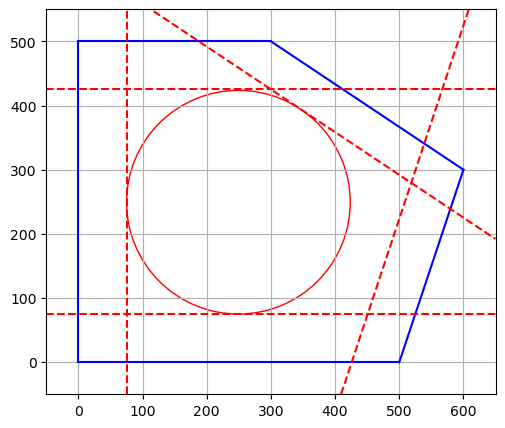

PyObject <matplotlib.patches.Circle object at 0x7fa1c2568dc0>

In [43]:
using PyPlot

# Defining a function to plot the outline of the museum area
function plot_site(mode)
    plot([0,0], [0,500], "b-")
    plot([0,500], [0,0], "b-")
    plot([500,600], [0,300],"b-")
    plot([300,600], [500,300],"b-")
    plot([0,300], [500,500],"b-")
    
    plot([75,75], [-50,550], "r--")
    plot([-50,650], [425,425], "r--")
    plot([-50,650], [75,75], "r--")
    plot([409.33,625], [-50,600], "r--")
    plot([-50,650], [658.33,192], "r--")
    
    axis("image")
    axis([-.5,6.5,-.5,5.5]*100)
    grid()
    plt.gcf().gca().add_artist(plt.Circle((center[1],center[2]), radius, color="r", fill=false));
end

figure(figsize=(6,5))
plot_site(1)

In conclusion of problem 3b), we see that the optimal location for the center of the museum is at (249.3061, 249.3061) feet, and the maximum radius for the museum is 174.3061 feet.

In the plot above, the blue lines represent the original polyhedron, the red deshed lines represent the planes' boundaries with the 75 foot clearance rule taken into consideration, and the red circle represents the optimal circular museum that can be built while respecting the 75 foot clearance rule.

I find this an interesting solution. I first plotted the blue lines, then plotted the circle, then put the relative boundaries in red dashes over the top after. It's interesting that the optimal circle touches 4 of the 5 boundaries, and it makes sense because going any further right will result in a smaller radius. It's a cool conclusion when the numbers work out and can be seen so elegant working together visually.